In [186]:
import numpy as np
import PIL
from PIL import Image

In [187]:
imageArray = [[1,1,0,1,1,1,0,1],[1,1,0,1,0,1,0,1],[1,1,1,1,0,0,0,1],[0,0,0,0,0,0,0,1],[1,1,1,1,0,1,0,1],[0,0,0,1,0,1,0,1],[1,1,1,1,0,0,0,1],[1,1,1,1,0,1,1,1]]

In [188]:
print(imageArray)

[[1, 1, 0, 1, 1, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1], [1, 1, 1, 1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 0, 1, 0, 1], [0, 0, 0, 1, 0, 1, 0, 1], [1, 1, 1, 1, 0, 0, 0, 1], [1, 1, 1, 1, 0, 1, 1, 1]]


In [189]:
storeArray = [[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0]]

In [190]:
print (storeArray)
print(storeArray[0][0])

[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]
0


In [191]:
label = 1
preferences = []
Length = len(imageArray)
print(Length)
for i in range(len(imageArray)):

    for j in range(len(imageArray[i])):
        if ((i == 0) and (j == 0)):
            
            if (imageArray[i][j] > 0):
                
                storeArray[i][j] = label
        if ((i==0) and (j > 0)):
            if(imageArray[i][j] > 0):
                if (imageArray[i][j-1] > 0):
                    storeArray[i][j] = label
                   
                else:
                    storeArray[i][j] = label
            else:
                storeArray[i][j] = 0
                label+=1
        if(i>0 and j==0):
            if(imageArray[i][j]>0):
                if(storeArray[i-1][j]>0):
                    current_pixel = storeArray[i-1][j]
                    storeArray[i][j] = current_pixel
                else:
                    label+=1
                    current_pixel = label
                    storeArray[i][j]= current_pixel
            else:
                storeArray[i][j]=0
        if(i>0 and j>0):
            if (imageArray[i][j]>0):
                if (storeArray[i-1][j]>0 or storeArray[i][j-1]>0):
                   
                    if(storeArray[i-1][j]==storeArray[i][j-1]):
                        
                        current_pixel=storeArray[i-1][j]
                        
                        storeArray[i][j] = current_pixel
                    elif (storeArray[i-1][j]<storeArray[i][j-1] and storeArray[i-1][j] !=0):
                        
                        current_pixel = storeArray[i-1][j]
                        storeArray[i][j] = current_pixel
                        
                        preferences.append((i,j))
                    elif (storeArray[i][j-1]<storeArray[i-1][j] and storeArray[i][j-1] !=0):
                        
                        current_pixel = storeArray[i][j-1]
                        storeArray[i][j] = current_pixel
                        
                        preferences.append((i,j))
                    elif (storeArray[i-1][j]<storeArray[i][j-1] and storeArray[i-1][j]==0):
                        
                        current_pixel = storeArray[i][j-1]
                        storeArray[i][j] = current_pixel
                        
                    else:
                        current_pixel = storeArray[i-1][j]
                        storeArray[i][j] = current_pixel
                        

                else:
                    label+=1
                    current_pixel = label
                    storeArray[i][j] = current_pixel
            else:
                storeArray[i][j] = 0

8


In [194]:

print (storeArray)
print (preferences)


[[1, 1, 0, 2, 2, 2, 0, 3], [1, 1, 0, 2, 0, 2, 0, 3], [1, 1, 1, 1, 0, 0, 0, 3], [0, 0, 0, 0, 0, 0, 0, 3], [4, 4, 4, 4, 0, 5, 0, 3], [0, 0, 0, 4, 0, 5, 0, 3], [6, 6, 6, 4, 0, 0, 0, 3], [6, 6, 6, 4, 0, 7, 7, 3]]
[(2, 3), (6, 3), (7, 3), (7, 7)]


In [195]:
def secondPass(current_pix, new_pix):
    for i in range(len(imageArray)):
        for j in range(len(imageArray[i])):
            if(storeArray[i][j] == current_pix):
                storeArray[i][j] = new_pix

    

In [196]:
newImageArray = []
for i in range(len(preferences)):
    x,j = preferences[i]
    print (x,j)
    if ((storeArray[x-1][j]> 0 )and (storeArray[x-1][j] > storeArray[x][j])):
        current_pix = storeArray[x-1][j]
        new_pix = storeArray[x][j]
        secondPass(current_pix, new_pix)
    elif (x+1 < len(storeArray) -1):
        if ((storeArray[x+1][j]> 0 )and (storeArray[x+1][j] > storeArray[x][j])):
            current_pix = storeArray[x+1][j]
            new_pix = storeArray[x][j]
            secondPass(current_pix, new_pix)
    elif ((storeArray[x][j-1]> 0 )and (storeArray[x][j-1] > storeArray[x][j])):
        current_pix = storeArray[x][j-1]
        new_pix = storeArray[x][j]
        secondPass(current_pix, new_pix)
    elif (j+1 <len(storeArray[i])-1):
        if ((storeArray[x][j+1]> 0 )and (storeArray[x][j+1] > storeArray[x][j])):
            current_pix = storeArray[x][j+1]
            new_pix = storeArray[x][j]
            secondPass(current_pix, new_pix)
            


2 3
6 3
7 3
7 7


In [197]:
print(storeArray)

[[1, 1, 0, 1, 1, 1, 0, 3], [1, 1, 0, 1, 0, 1, 0, 3], [1, 1, 1, 1, 0, 0, 0, 3], [0, 0, 0, 0, 0, 0, 0, 3], [4, 4, 4, 4, 0, 5, 0, 3], [0, 0, 0, 4, 0, 5, 0, 3], [4, 4, 4, 4, 0, 0, 0, 3], [4, 4, 4, 4, 0, 3, 3, 3]]


In [218]:
import cv2
import numpy as np
from PIL import Image
import sys
import math, random
from matplotlib import pyplot as plt

In [219]:
img = cv2.imread('Lab4-image.png',1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [220]:
width, height = img.shape

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

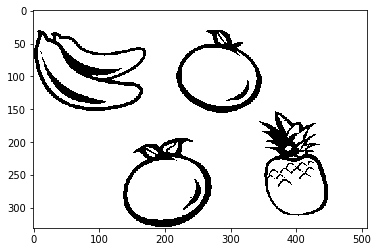

In [221]:
img = th1
plt.imshow(img,'gray')
plt.show()

In [222]:
imageArray = np.array(img)
print(imageArray)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [223]:
storeArray = [ [0]*height for i in range(width)]

        
storeArray = np.array(array2)
print(np_array2)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [224]:
label = 100 #for visibility
preferences = []
Length = len(imageArray)

for i in range(len(imageArray)):

    for j in range(len(imageArray[i])):
        if ((i == 0) and (j == 0)):
            
            if (imageArray[i][j] > 0):
                
                storeArray[i][j] = label
        if ((i==0) and (j > 0)):
            if(imageArray[i][j] > 0):
                if (imageArray[i][j-1] > 0):
                    storeArray[i][j] = label
                   
                else:
                    storeArray[i][j] = label
            else:
                storeArray[i][j] = 0
                label+=1
        if(i>0 and j==0):
            if(imageArray[i][j]>0):
                if(storeArray[i-1][j]>0):
                    current_pixel = storeArray[i-1][j]
                    storeArray[i][j] = current_pixel
                else:
                    label+=1
                    current_pixel = label
                    storeArray[i][j]= current_pixel
            else:
                storeArray[i][j]=0
        if(i>0 and j>0):
            if (imageArray[i][j]>0):
                if (storeArray[i-1][j]>0 or storeArray[i][j-1]>0):
                    
                    if(storeArray[i-1][j]==storeArray[i][j-1]):
                        
                        current_pixel=storeArray[i-1][j]
                        
                        storeArray[i][j] = current_pixel
                    elif (storeArray[i-1][j]<storeArray[i][j-1] and storeArray[i-1][j] !=0):
                        
                        current_pixel = storeArray[i-1][j]
                        storeArray[i][j] = current_pixel
                        
                        preferences.append((i,j))
                    elif (storeArray[i][j-1]<storeArray[i-1][j] and storeArray[i][j-1] !=0):
                        
                        current_pixel = storeArray[i][j-1]
                        storeArray[i][j] = current_pixel
                       
                        preferences.append((i,j))
                    elif (storeArray[i-1][j]<storeArray[i][j-1] and storeArray[i-1][j]==0):
                        
                        current_pixel = storeArray[i][j-1]
                        storeArray[i][j] = current_pixel
                        
                    else:
                        current_pixel = storeArray[i-1][j]
                        storeArray[i][j] = current_pixel
                        

                else:
                    label+=1
                    current_pixel = label
                    storeArray[i][j] = current_pixel
            else:
                storeArray[i][j] = 0

In [225]:
def secondPass(current_pix, new_pix):
    for i in range(len(imageArray)):
        for j in range(len(imageArray[i])):
            if(storeArray[i][j] == current_pix):
                storeArray[i][j] = new_pix
for i in range(len(preferences)):
    x,j = preferences[i]
    
    if ((storeArray[x-1][j]> 0 )and (storeArray[x-1][j] > storeArray[x][j])):
        current_pix = storeArray[x-1][j]
        new_pix = storeArray[x][j]
        secondPass(current_pix, new_pix)
    elif (x+1 < width -1):
        if ((storeArray[x+1][j]> 0 )and (storeArray[x+1][j] > storeArray[x][j])):
            current_pix = storeArray[x+1][j]
            new_pix = storeArray[x][j]
            secondPass(current_pix, new_pix)
    elif ((storeArray[x][j-1]> 0 )and (storeArray[x][j-1] > storeArray[x][j])):
        current_pix = storeArray[x][j-1]
        new_pix = storeArray[x][j]
        secondPass(current_pix, new_pix)
    elif (j+1 <height):
        if ((storeArray[x][j+1]> 0 )and (storeArray[x][j+1] > storeArray[x][j])):
            current_pix = storeArray[x][j+1]
            new_pix = storeArray[x][j]
            secondPass(current_pix, new_pix)


In [226]:

cv2.imwrite('Result.png', storeArray)
        

True

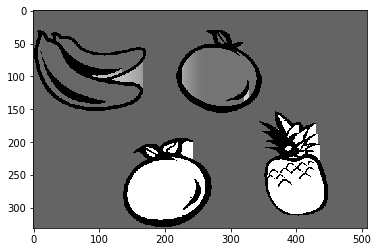

In [227]:
img = cv2.imread('Result.png')
plt.imshow(img)